# **Explanatory Analysis of the GoFord Bike System Data**

### This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
### Importing the cleaned dataset

df = pd.read_csv(r'C:\Users\ilesanmi\Desktop\Udacity\Vis Proj\cleaned_data.csv')

## **A sample view of the Dataset**

In [69]:
df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_time,start_month,start_hour,day_time,end_hour,return_time
126462,1357,2019-02-10 17:56:47.382,2019-02-10 18:19:25.372,371.0,Lombard St at Columbus Ave,37.80275,-122.41358,371.0,Lombard St at Columbus Ave,37.80275,...,1984,Male,No,35,0:22:37,2,17,evening,18,morning
32143,1413,2019-02-24 14:43:00.497,2019-02-24 15:06:33.770,171.0,Rockridge BART Station,37.84428,-122.25190,256.0,Hearst Ave at Euclid Ave,37.87511,...,1972,Male,No,47,0:23:33,2,14,afternoon,15,afternoon
77192,510,2019-02-19 07:23:16.030,2019-02-19 07:31:46.463,79.0,7th St at Brannan St,37.77349,-122.40367,324.0,Union Square (Powell St at Post St),37.78830,...,1986,Male,No,33,0:08:30,2,7,morning,7,morning


In [70]:
def myCountPlot(df, xVar, order = None, hueOrder = None, palette = None, figsize=[14,10]):
    plt.figure(figsize=figsize)

    c=sns.countplot(data=df, y = xVar, edgecolor = 'black', order = order, hue_order = hueOrder, palette=palette)
    xVar = xVar.replace('_', ' ')
    #hueVar = hueVar.replace('_', ' ')
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize = 14, weight = 'bold')
    plt.ylabel(xVar.title(), fontsize=10, weight ='bold')
    plt.xlabel('Frequency'.title(), fontsize = 10, weight = 'bold')


def myCountPlotH(df, xVar, hueVar, order = None, hueOrder = None, palette = None, figsize=[14,10]):
    plt.figure(figsize=figsize)

    c=sns.countplot(data=df, y = xVar, hue = hueVar, edgecolor = 'black', order = order, hue_order = hueOrder, palette=palette)
    xVar = xVar.replace('_', ' ')
    hueVar = hueVar.replace('_', ' ')
    plt.title(f'''Distribution of {xVar} by {hueVar}'''.title(), fontsize = 14, weight = 'bold')
    plt.ylabel(xVar.title(), fontsize=10, weight ='bold')
    plt.xlabel('Frequency'.title(), fontsize = 10, weight = 'bold')

#day_time_order = ['morning', 'afternoon', 'evening', 'night']

#myCountPlotH(df_top_ten, 'start_station_name', 'day_time', hueOrder=day_time_order, palette = 'PuBu')


### Analysis goes thus:

# **The most common Gender that makes use of the bike**

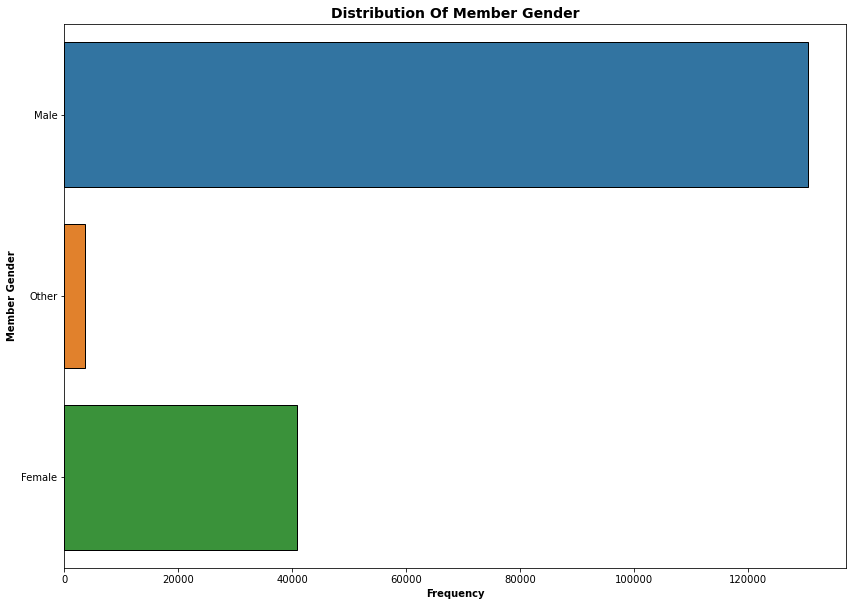

In [71]:
myCountPlot(df, 'member_gender')

#### This plot is necessary as it makes us know the gender of the majority of the users

### **Observation:** It so happens that the male Gender happens to be more interested in biking than females.

# **What time of the day do we have most rides**

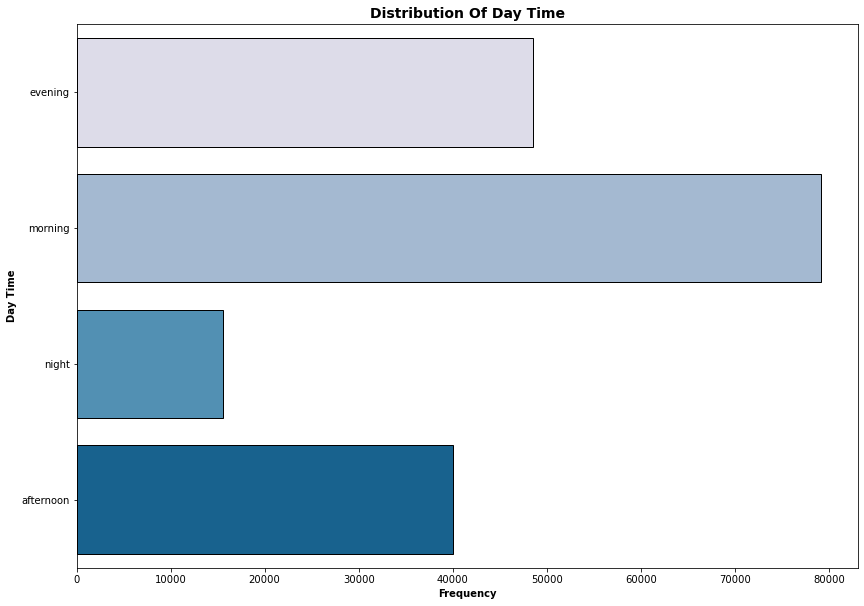

In [72]:
day_time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
#myCountPlotH(df, 'day_time', hueOrder=day_time_order, palette = 'PuBu')

myCountPlot(df, 'day_time', hueOrder=day_time_order, palette = 'PuBu')

#### It is necessary to know what time of the day services are mostly needed to be able to ensure all equipments are made available

#### **Observation:** During the day, there are more trips in the morning and afternoon than at night. It probably because of rush hours. There are more rides in the afternoon... this i believe is cause of students who return frm school and goes biking. And then, at night, peeps tend return home


### **What particular hour of the day do we have most biking**

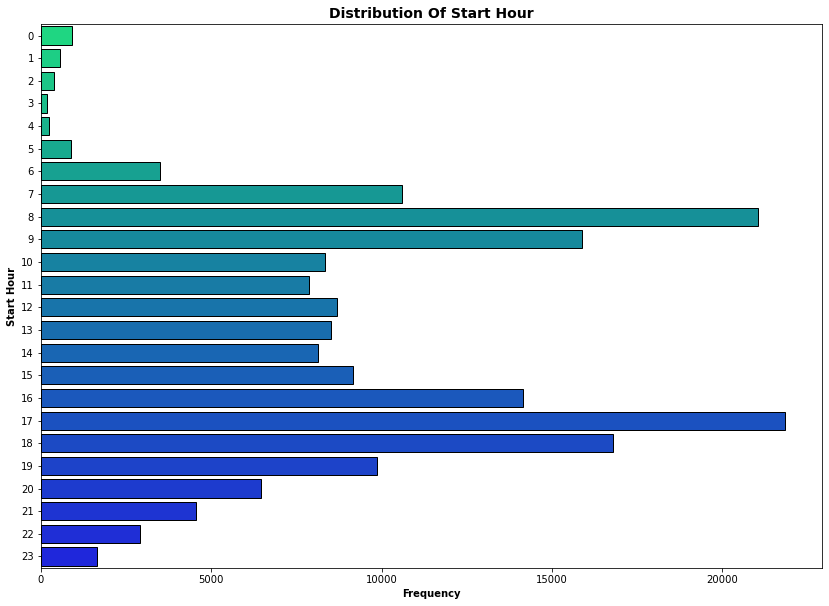

In [73]:
myCountPlot(df, 'start_hour', palette='winter_r')


##### **Observation:** 17pm and 8am are active going to work times. So we can infer that most people who bike do so cause of their transportation to and back from work

### **What usertype use the biking system mostly**

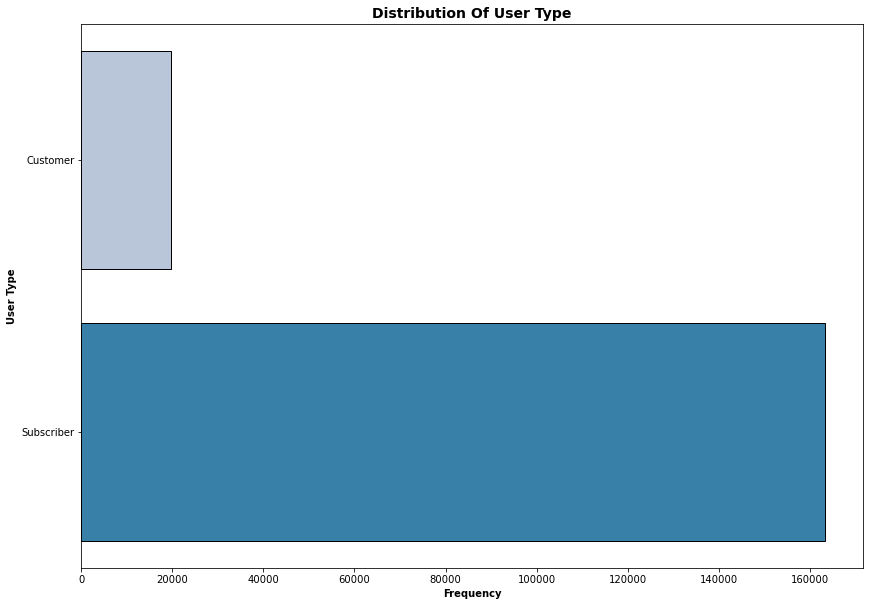

In [74]:
#df['user_type'].value_counts().plot(kind = 'bar')
#plt.title('Bike user types')
#plt.ylabel('Count')

myCountPlot(df, 'user_type', palette='PuBu')


#### **observation:** so we have more of subscribers than customers

## **Top ten stations**
**Start station**

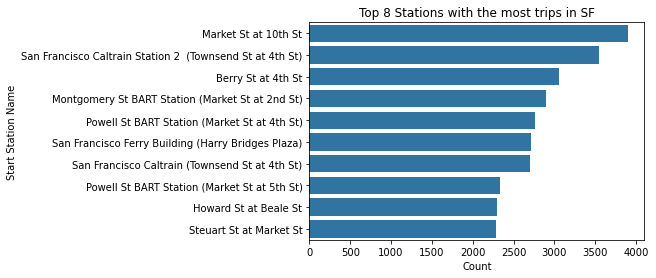

In [75]:
top10 = ['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Berry St at 4th St','Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)'
,'San Francisco Ferry Building (Harry Bridges Plaza)','San Francisco Caltrain (Townsend St at 4th St)', 'Powell St BART Station (Market St at 5th St)','Howard St at Beale St','Steuart St at Market St']

df_top_ten = df.loc[df['start_station_name'].isin(top10)]

#df_top_ten
st_stat_order = df_top_ten['start_station_name'].value_counts().index

base_color = sns.color_palette()[0]
sns.countplot(data=df_top_ten, y='start_station_name', color=base_color, order=st_stat_order, )
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 8 Stations with the most trips in SF');

In [76]:
df['start_station_name'].value_counts().nlargest(10)

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2709
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
Name: start_station_name, dtype: int64

### **checking for the endstation**

In [77]:
df['end_station_name'].value_counts().nlargest(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
San Francisco Caltrain (Townsend St at 4th St)               2947
Berry St at 4th St                                           2872
The Embarcadero at Sansome St                                2512
Powell St BART Station (Market St at 5th St)                 2353
Steuart St at Market St                                      2338
Name: end_station_name, dtype: int64

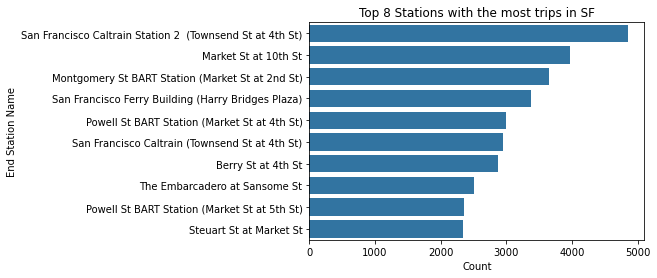

In [78]:
top10 = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','San Francisco Ferry Building (Harry Bridges Plaza)','Powell St BART Station (Market St at 4th St)',
'San Francisco Caltrain (Townsend St at 4th St)','Berry St at 4th St','The Embarcadero at Sansome St','Powell St BART Station (Market St at 5th St)','Steuart St at Market St']

df_top_ten_2 = df.loc[df['end_station_name'].isin(top10)]

#df_top_ten
st_stat_order = df_top_ten_2['end_station_name'].value_counts().index

base_color = sns.color_palette()[0]
sns.countplot(data=df_top_ten_2, y='end_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.title('Top 8 Stations with the most trips in SF');


#### **Observation:** San Francisco Caltrain Station 2  (Townsend St at 4th St) seems to be a veery busy place. It tops the return location and seconds the start_ride_location. But still the top 10 start station and end station are about the same stations

## **IS there any correlation between duration and age?**

Text(0.5, 1.0, 'retlationship between ride duration and age')

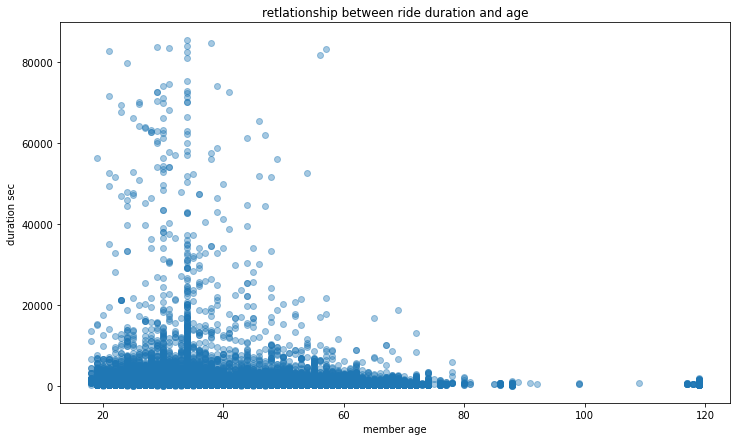

In [79]:

plt.figure(figsize=(12,7))
plt.scatter(df.member_age,df.duration_sec, alpha = 0.4)
plt.xlabel('member age')
plt.ylabel('duration sec')
plt.title('retlationship between ride duration and age')

#### **Observation:**
* This looks like ther's a **slight** negative correlation

C:\Users\ilesanmi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


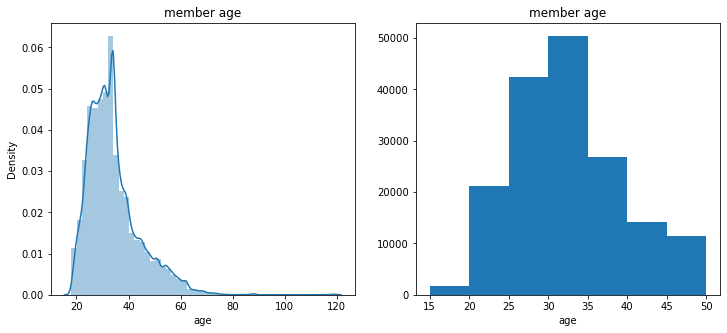

In [80]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(df['member_age']);
plt.title('member age')
plt.xlabel('age')

plt.subplot(1,2,2)
bb = np.arange(15, df['member_age'].mean()+20, 5)
plt.hist(df['member_age'], bins = bb);
plt.title('member age')
plt.xlabel('age')
plt.show()

#### **Observation:** We can see a good number of people are within the age 20 and 45. Lets see the correlation better within that age bracket

### Further look into ride duration between age 20 and 45

Text(0.5, 1.0, 'retlationship between ride duration and age within 20 and 45')

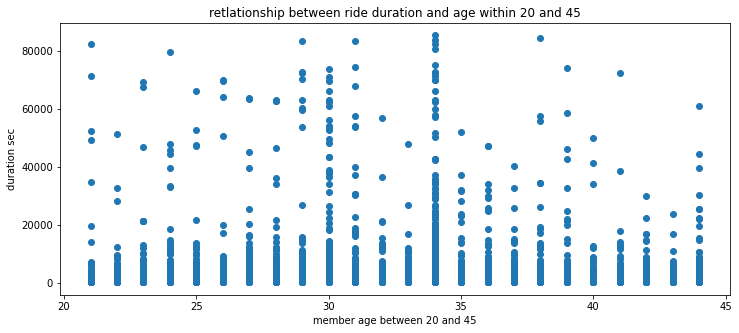

In [81]:
active_ages = df.query('member_age > 20 & member_age<45')
#active_ages
plt.figure(figsize = (12,5))

plt.scatter(active_ages['member_age'], active_ages['duration_sec'])
plt.xlabel('member age between 20 and 45')
plt.ylabel('duration sec')
plt.title('retlationship between ride duration and age within 20 and 45')

#### **observation:** More duration time on the left side of age 35
 * So aside the unique duration at age 34 and 30, the slight negative correlation can be seen

In [82]:
#### Number of trips for each day time -- morning, afternoon, evening and night

## **For the top 10 stations, how are the rides for each time of the day**
#### Number of trips for each day time -- morning, afternoon, evening and night
**start station**

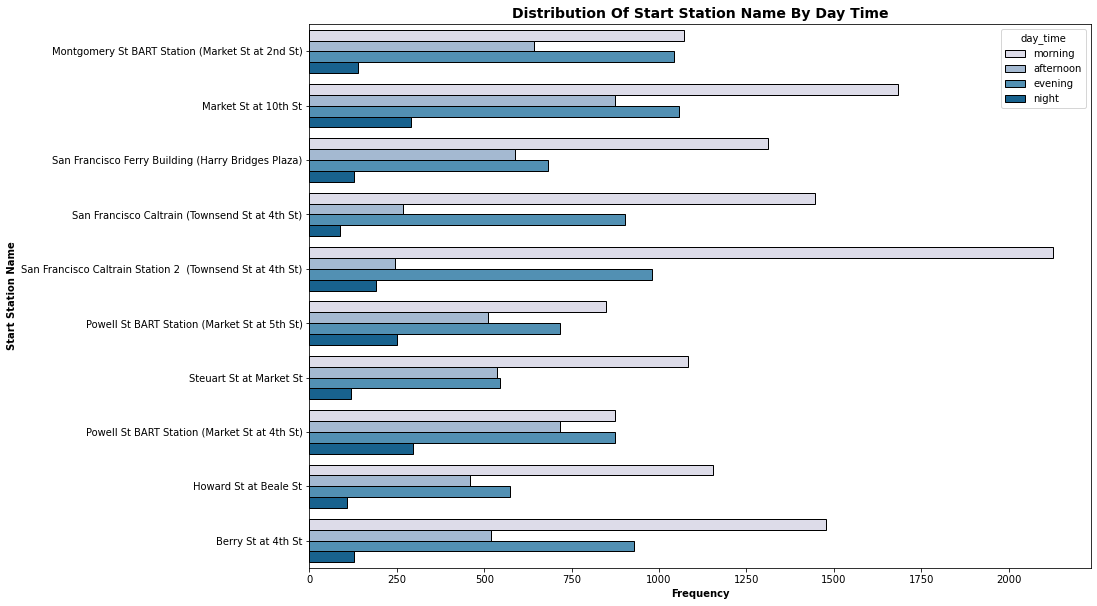

In [83]:
day_time_order = ['morning', 'afternoon', 'evening', 'night']

myCountPlotH(df_top_ten, 'start_station_name', 'day_time', hueOrder=day_time_order, palette = 'PuBu')



**Checking for End station**

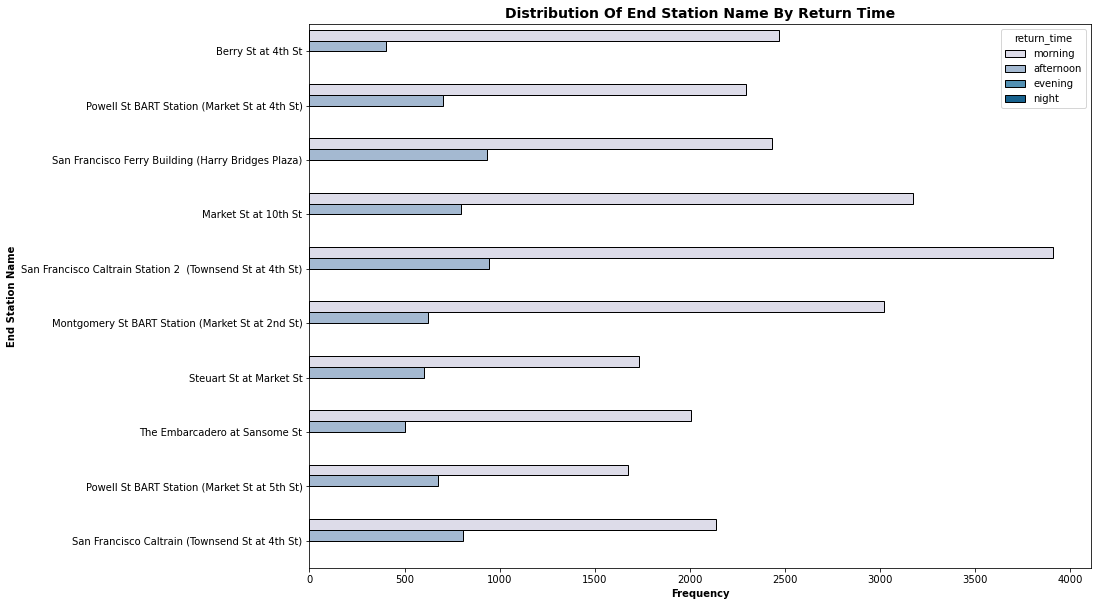

In [84]:

day_time_order = ['morning', 'afternoon', 'evening', 'night']

myCountPlotH(df_top_ten_2, 'end_station_name', 'return_time', hueOrder=day_time_order, palette = 'PuBu')


#### **Observation:** So, aside morning, most of the rides are between 5pm and 7pm --- evening and also, sanfrancisco seems to be a very busy industrious area

### Clearer visuals:
#### start station

<Figure size 2016x720 with 0 Axes>

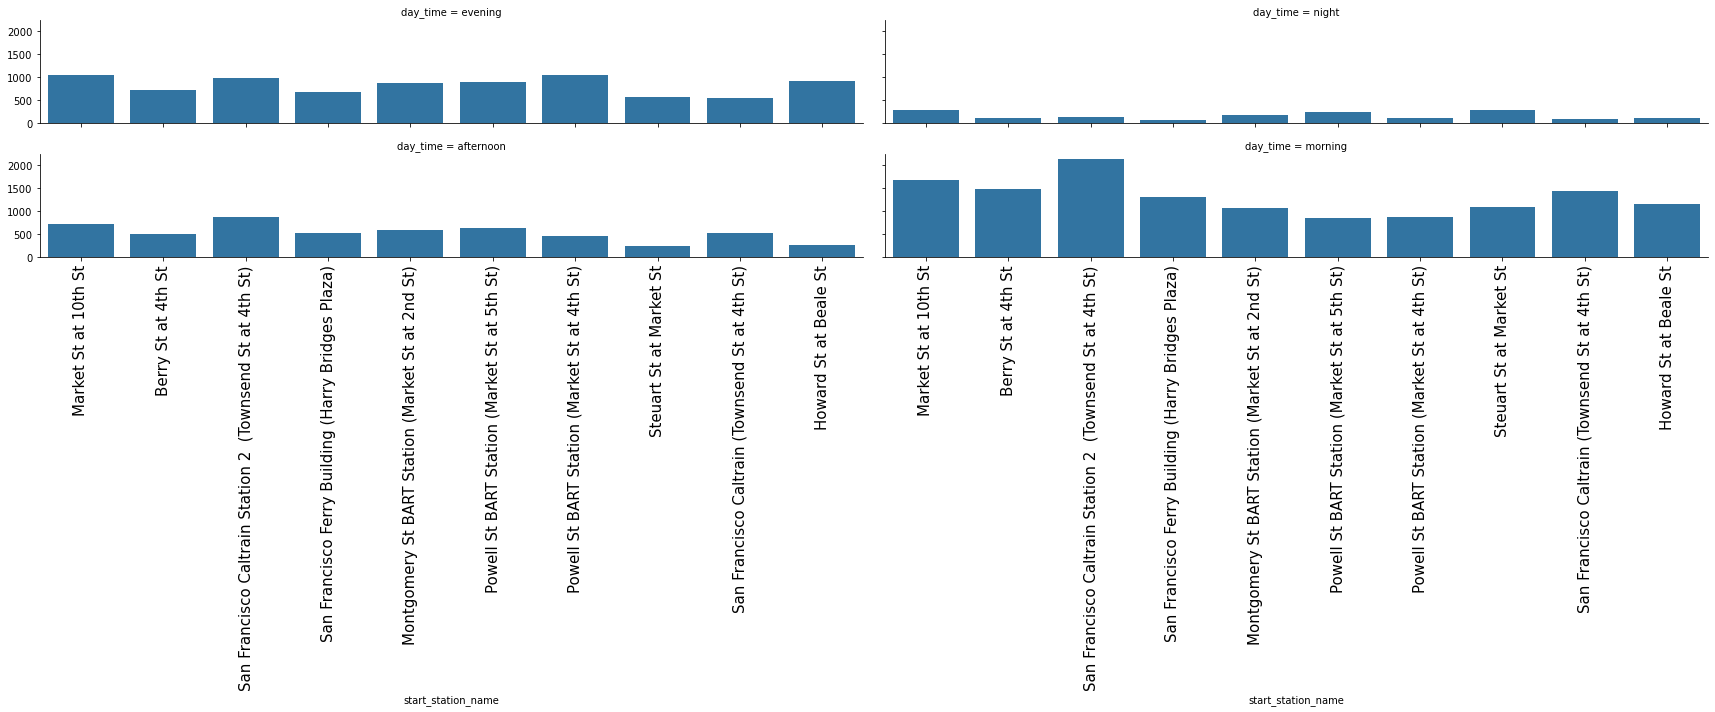

In [85]:
plt.figure(figsize=(28,10))
g = sns.FacetGrid(data = df_top_ten, col = 'day_time', col_wrap=2);
g.map(sns.countplot,'start_station_name', order = None);
g.set_xticklabels(rotation = 90, fontsize = 15)
g.fig.set_size_inches(24,10);
plt.tight_layout();

## Checking for return  station

C:\Users\ilesanmi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


<Figure size 2016x720 with 0 Axes>

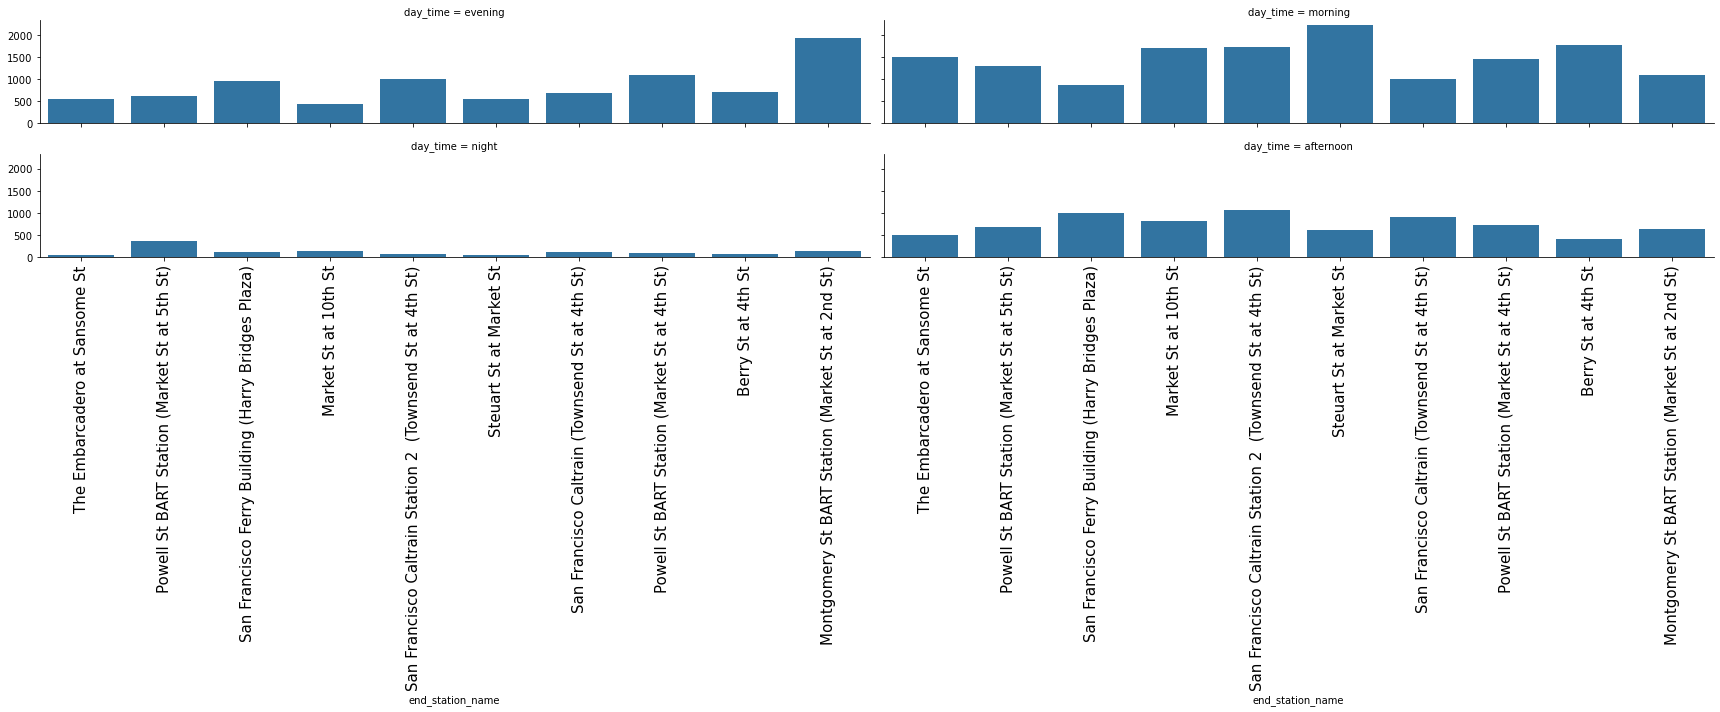

In [86]:
plt.figure(figsize=(28,10))
g = sns.FacetGrid(data = df_top_ten_2, col = 'day_time', col_wrap=2);
g.map(sns.countplot,'end_station_name', order = None);
g.set_xticklabels(rotation = 90, fontsize = 15)
g.fig.set_size_inches(24,10);
plt.tight_layout();
#plt.title('Facet look into the start station name, time and ride')

**For the two visuals:**

* more evident of how there are more rides in the morning and evening

#### 
* So, the order is morning > evening > afternoon > night

## **What is the average age of the member_age**

Text(0.5, 0, 'Gender')

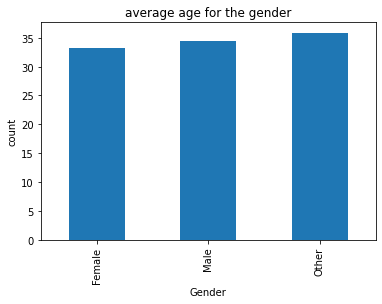

In [87]:
df.groupby('member_gender')['member_age'].mean().plot(kind = 'bar')
plt.title('average age for the gender')
plt.ylabel('count')
plt.xlabel('Gender')

In [88]:
df.groupby('member_gender')['member_age'].describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40804.0,33.221057,9.268773,18.0,27.0,31.0,37.0,119.0
Male,130500.0,34.453617,10.345189,18.0,27.0,32.0,39.0,119.0
Other,3647.0,35.897998,10.098447,19.0,29.0,34.0,40.0,109.0


### **observation:** they are about the same mean age even with more of male than others and spanning ranges

In [89]:
#!jupyter nbconvert 'Explanatory data Analysis -- Part 2' --to slides --post serve


#### **In Summary,**
#### Data shows that more rides are taken at morning and also in the evening. So I assumed that most of the people who make use of this service are working class.

#### Also, we have more of males than female who makes use of this services. This could be that many women are not bikers, hence the lesser amount of their usage

#### There's a slight negative correlation betweeen ride duration and age. Though there are times we have exceptional increase. But there are more rides at the lower ages than at the higher ages


In [90]:
#!jupyter nbconvert Explanatory_data_Analysis__Part_2.ipynb --to slides --post serve

In [ ]:
!jupyter nbconvert Explanatory_data_Analysis__Part_2.ipynb --to slides --post serve --no-input --no-prompt